In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\HMKMRHD.TTF"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont]+current_font_list

pd_data = pd.read_csv('이륜차신고현황_시도별_2014-2022.csv', encoding='cp949',header=1)
pd_data['시점']= pd_data['시점'].astype(np.float64)
pd_data.drop('시도명(1)', axis=1, inplace=True)
pd_data.set_index('시점', inplace=True)
pd_data = pd_data.reset_index()

pd_data.insert(0,'년', pd_data['시점'].apply(lambda x: str(x).split('.')[0]))
pd_data.insert(1,'월', pd_data['시점'].apply(lambda x: str(x).split('.')[1]))
pd_data.drop('시점', axis=1, inplace=True)

pd_data

,년,월,시군구(1),소계,경형,소형,중형,대형,소계.1,경형.1,소형.1,중형.1,대형.1
0,2014,01,금정구,108,24,10,74,0,8012,543,2653,4630,186
1,2014,01,기장군,50,7,7,36,0,4129,333,1453,2218,125
2,2014,01,남구,50,4,7,34,5,10812,736,3309,6473,294
3,2014,01,동구,25,2,1,22,0,4277,440,1149,2556,132
4,2014,01,동래구,62,3,1,58,0,8580,657,2968,4757,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2022,12,수영구,85,0,4,80,1,6705,310,1471,4243,681
1616,2022,12,연제구,134,5,4,89,36,6852,273,1587,4338,654
1617,2022,12,영도구,50,5,2,43,0,6378,219,1480,4344,335
1618,2022,12,해운대구,96,7,2,86,1,12706,536,2941,7901,1328


In [55]:
pd_data['경형수'] = pd_data['경형'] + pd_data['경형.1']
pd_data['소형수'] = pd_data['소형'] + pd_data['소형.1'] 
pd_data['중형수'] = pd_data['중형'] + pd_data['중형.1'] 
pd_data['대형수'] = pd_data['대형'] + pd_data['대형.1'] 
pd_data['총등록수'] = pd_data['경형수']+pd_data['소형수']+pd_data['중형수']+pd_data['대형수']

# pd_data['경형비율'] = pd_data['경형수'] / pd_data['총등록수'] *100
# pd_data['소형비율'] = pd_data['소형수'] / pd_data['총등록수'] *100
# pd_data['중형비율'] = pd_data['중형수'] / pd_data['총등록수'] *100
# pd_data['대형비율'] = pd_data['대형수'] / pd_data['총등록수'] *100

pd_data
# df2['주민수당_사건수'] = df2['건수 (건)'] / df2['주민등록인구<br>(A)'] *10000

,년,월,시군구(1),소계,경형,소형,중형,대형,소계.1,경형.1,소형.1,중형.1,대형.1,경형수,소형수,중형수,대형수,총등록수
0,2014,01,금정구,108,24,10,74,0,8012,543,2653,4630,186,567,2663,4704,186,8120
1,2014,01,기장군,50,7,7,36,0,4129,333,1453,2218,125,340,1460,2254,125,4179
2,2014,01,남구,50,4,7,34,5,10812,736,3309,6473,294,740,3316,6507,299,10862
3,2014,01,동구,25,2,1,22,0,4277,440,1149,2556,132,442,1150,2578,132,4302
4,2014,01,동래구,62,3,1,58,0,8580,657,2968,4757,198,660,2969,4815,198,8642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2022,12,수영구,85,0,4,80,1,6705,310,1471,4243,681,310,1475,4323,682,6790
1616,2022,12,연제구,134,5,4,89,36,6852,273,1587,4338,654,278,1591,4427,690,6986
1617,2022,12,영도구,50,5,2,43,0,6378,219,1480,4344,335,224,1482,4387,335,6428
1618,2022,12,해운대구,96,7,2,86,1,12706,536,2941,7901,1328,543,2943,7987,1329,12802


In [231]:
for i,e in enumerate(df_group_f['년'].unique()):
    filter1 = df_group_f['년'] == e
    print(i,e)

0 2014
1 2015
2 2016
3 2017
4 2018
5 2019
6 2020
7 2021
8 2022


### 년도별 시군구 총등록 대수 비율

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\544158066.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()


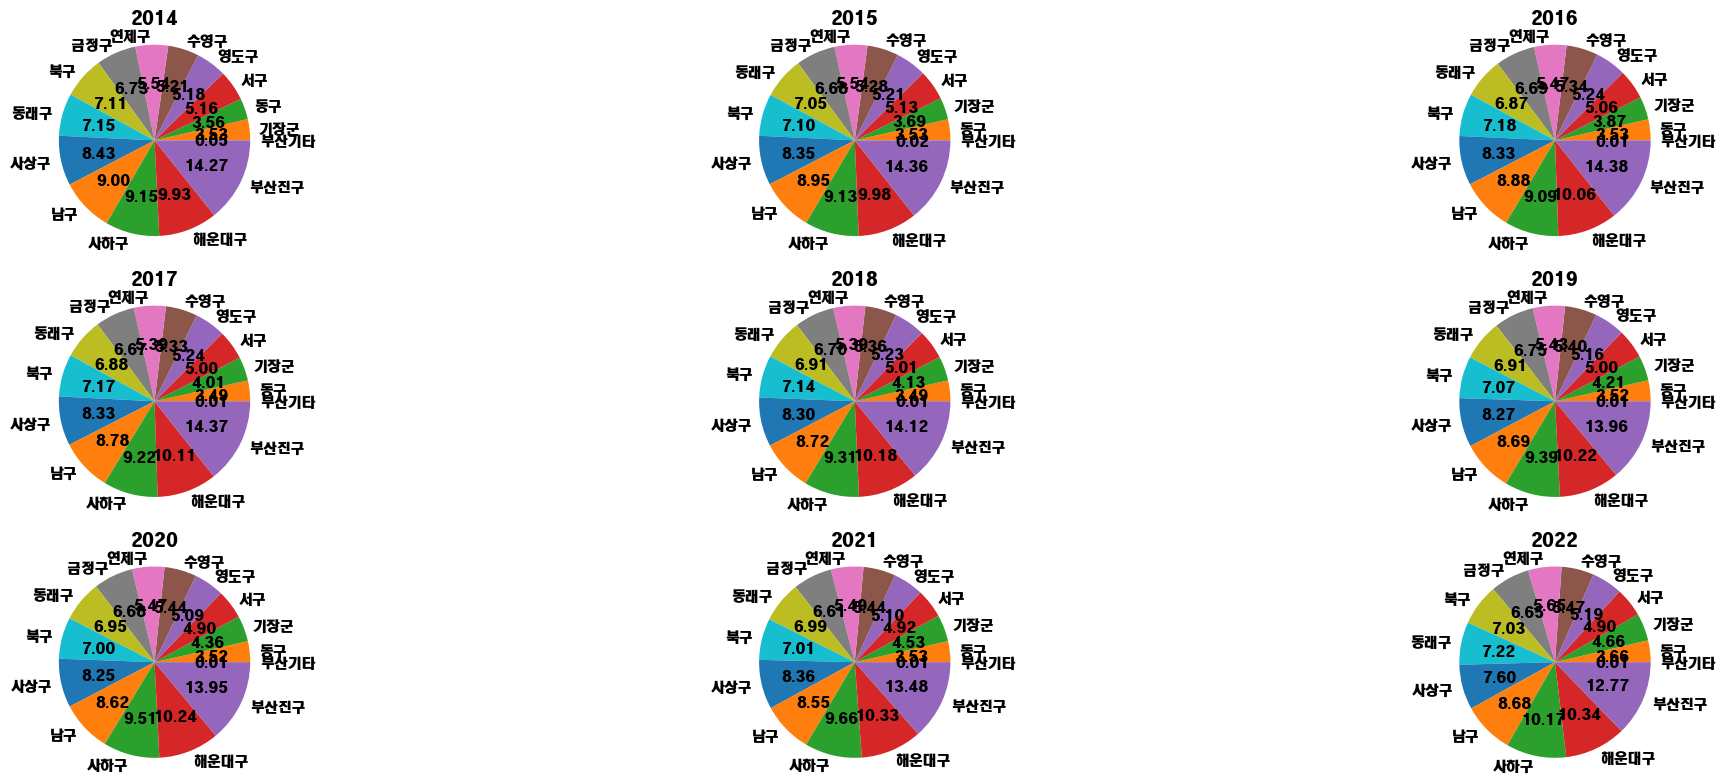

In [3]:
g1 = pd_data.groupby(['시군구(1)','년'])
df_group = g1.mean()
df_group_f = df_group.reset_index()
fig, axes = plt.subplots(3,3,figsize=(6.4*4, 4.8*2))
col_name = df_group_f.columns
# print(col_name)
df_group_f
for i,e in enumerate(df_group_f['년'].unique()):
    filter1 = df_group_f['년'] == e
    ax = axes[i//3,i%3]
    xs = df_group_f.loc[filter1,'년']
    ys = df_group_f.loc[filter1,col_name].sort_values('총등록수')
    ax.set_title(e)
    ax.pie(ys.iloc[:,-1], labels=ys.iloc[:,0],radius=1.1,autopct='%.2f') 


### TOP7 뽑아보기

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\3467502218.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g2.mean()


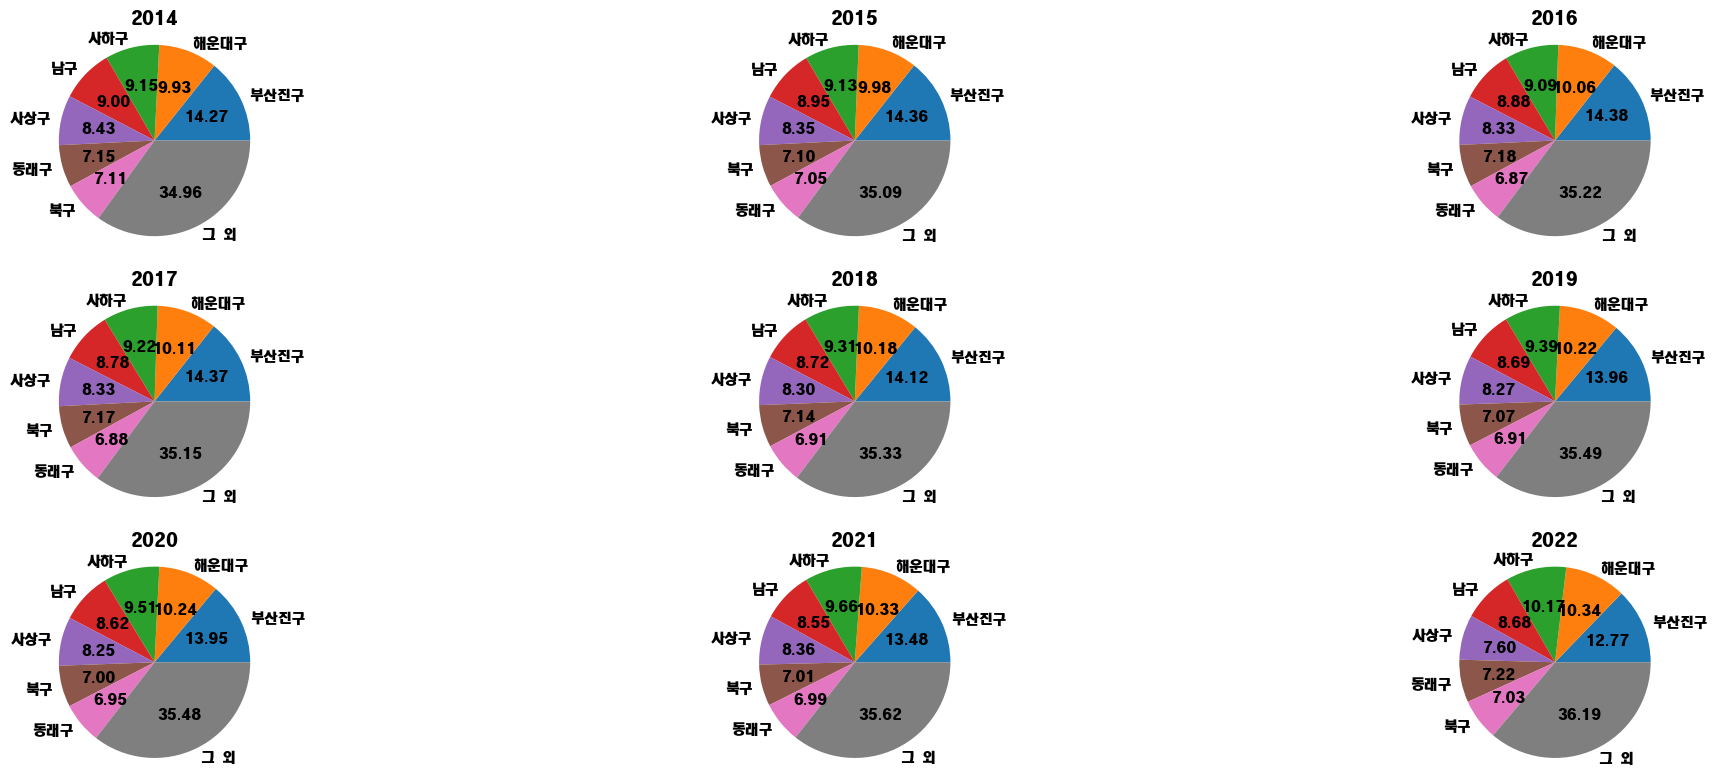

In [4]:
g2 = pd_data.groupby(['시군구(1)','년'])
df_group = g2.mean()
df_group_f = df_group.reset_index()
fig, axes = plt.subplots(3,3,figsize=(6.4*4, 4.8*2))
col_name = df_group_f.columns

for i,e in enumerate(df_group_f['년'].unique()):
    filter1 = df_group_f['년'] == e
    ax = axes[i//3,i%3]
    xs = df_group_f.loc[filter1,'년']
    ys = df_group_f.loc[filter1,col_name].sort_values('총등록수', ascending=False)
    top5 = ys.iloc[:7,-1].to_list()
    others = ys.iloc[7:,-1].sum()
    top5.append(others)
    top5_l = ys.iloc[:7,0].to_list()
    top5_l = top5_l + ['그 외']
#     print(ys)
#     print(top5_l)
#     print(others)
    

    ax.set_title(e)
    ax.pie(top5, labels=top5_l, radius=1.1, autopct='%.2f')

In [118]:
a1 = np.arange(10)
print(a1)
np.add.reduceat(a1, [0,5])

s1 = pd.Series(a1)
print(s1)
np.add.reduceat(s1.to_numpy(), [0,5])

[0 1 2 3 4 5 6 7 8 9]
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32


array([10, 35])

### 년도별 중형, 소형 이륜차의 비율

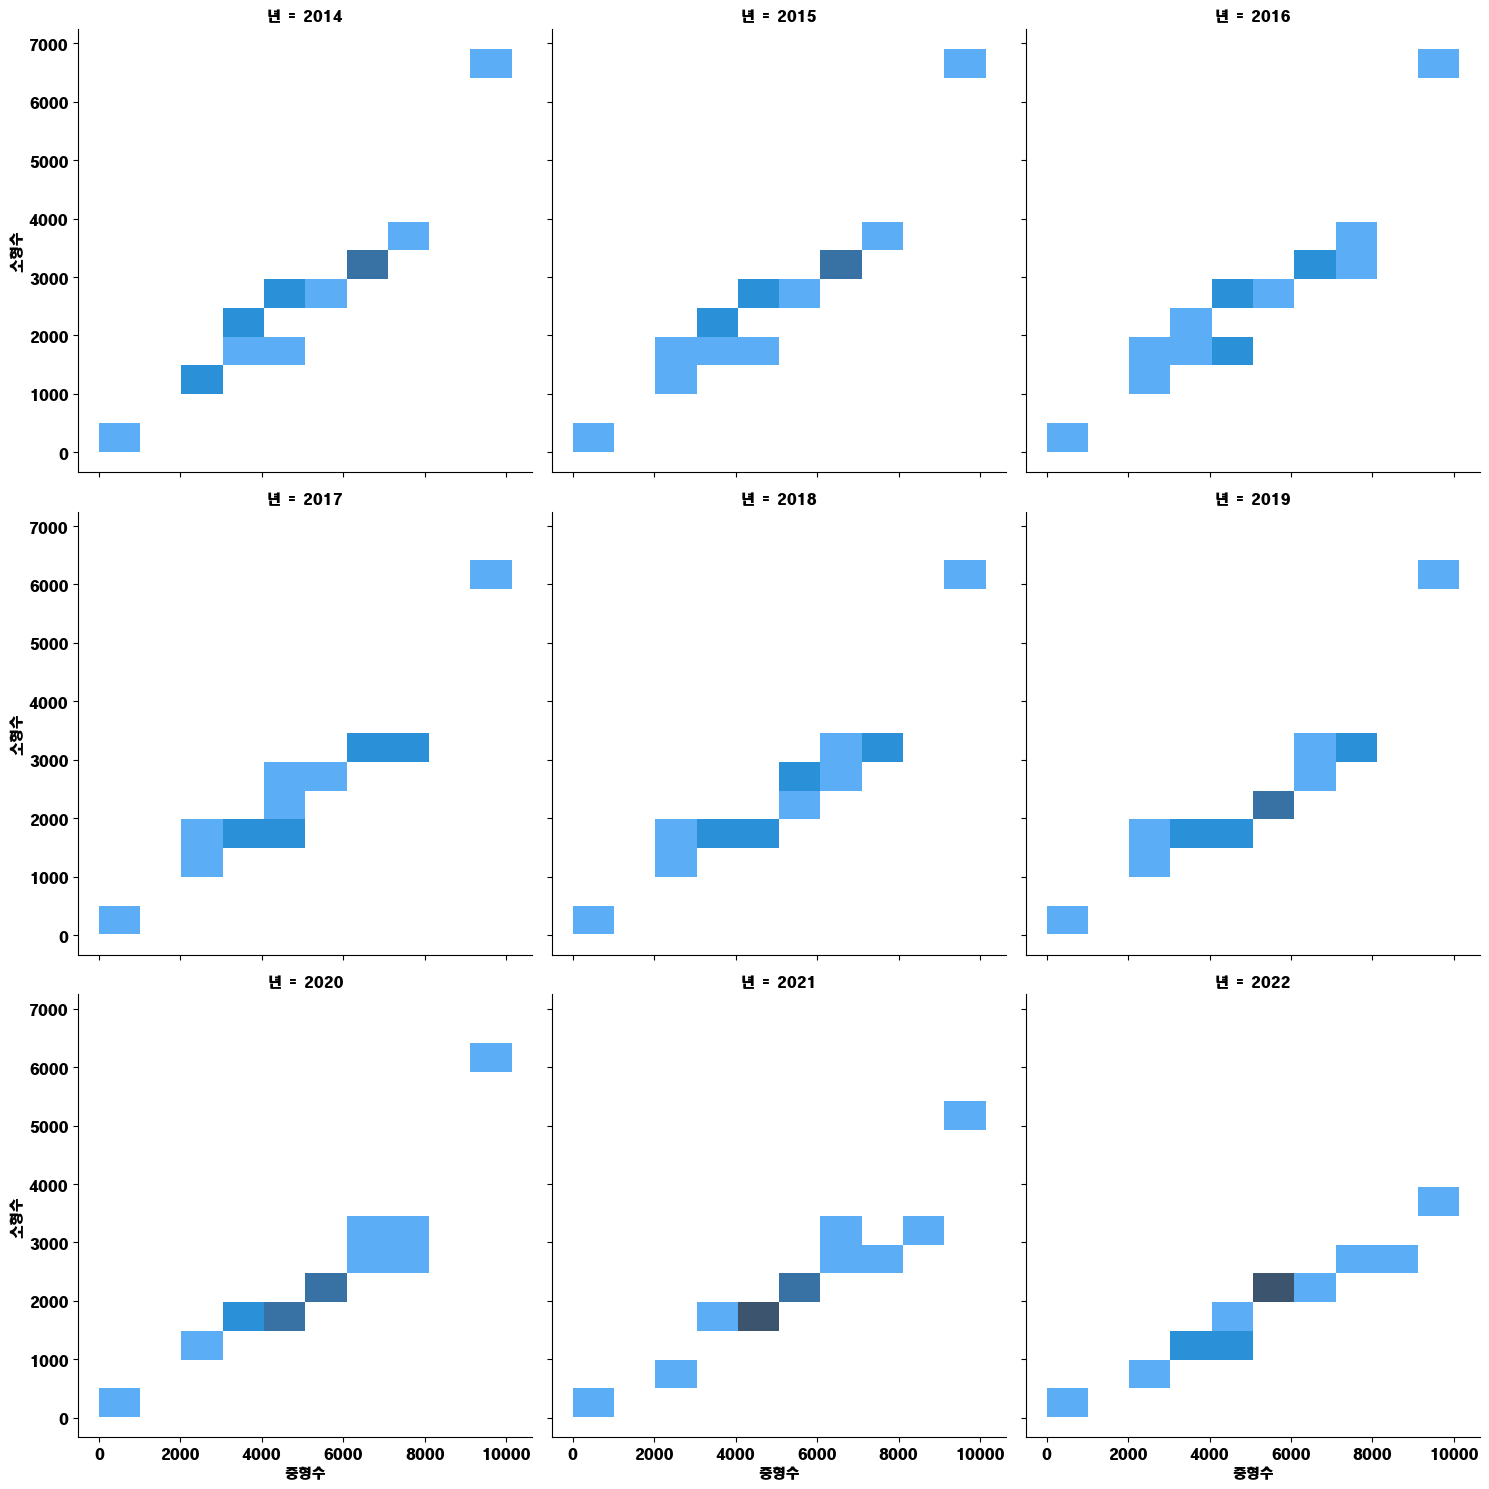

In [56]:
ax1 = sns.displot(data=df_group_f, x='중형수',y='소형수',col='년', col_wrap=3, kind='hist')

# # ax2 = ax1.twinx()
# sns.displot(data=df_gruop_f,x='중형수',y='대형수', col='년', col_wrap=3,kind='hist', ax=ax2)

## 시군구별 총등록수와 경형,소형,중형,대형 그래프

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\3269473628.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()


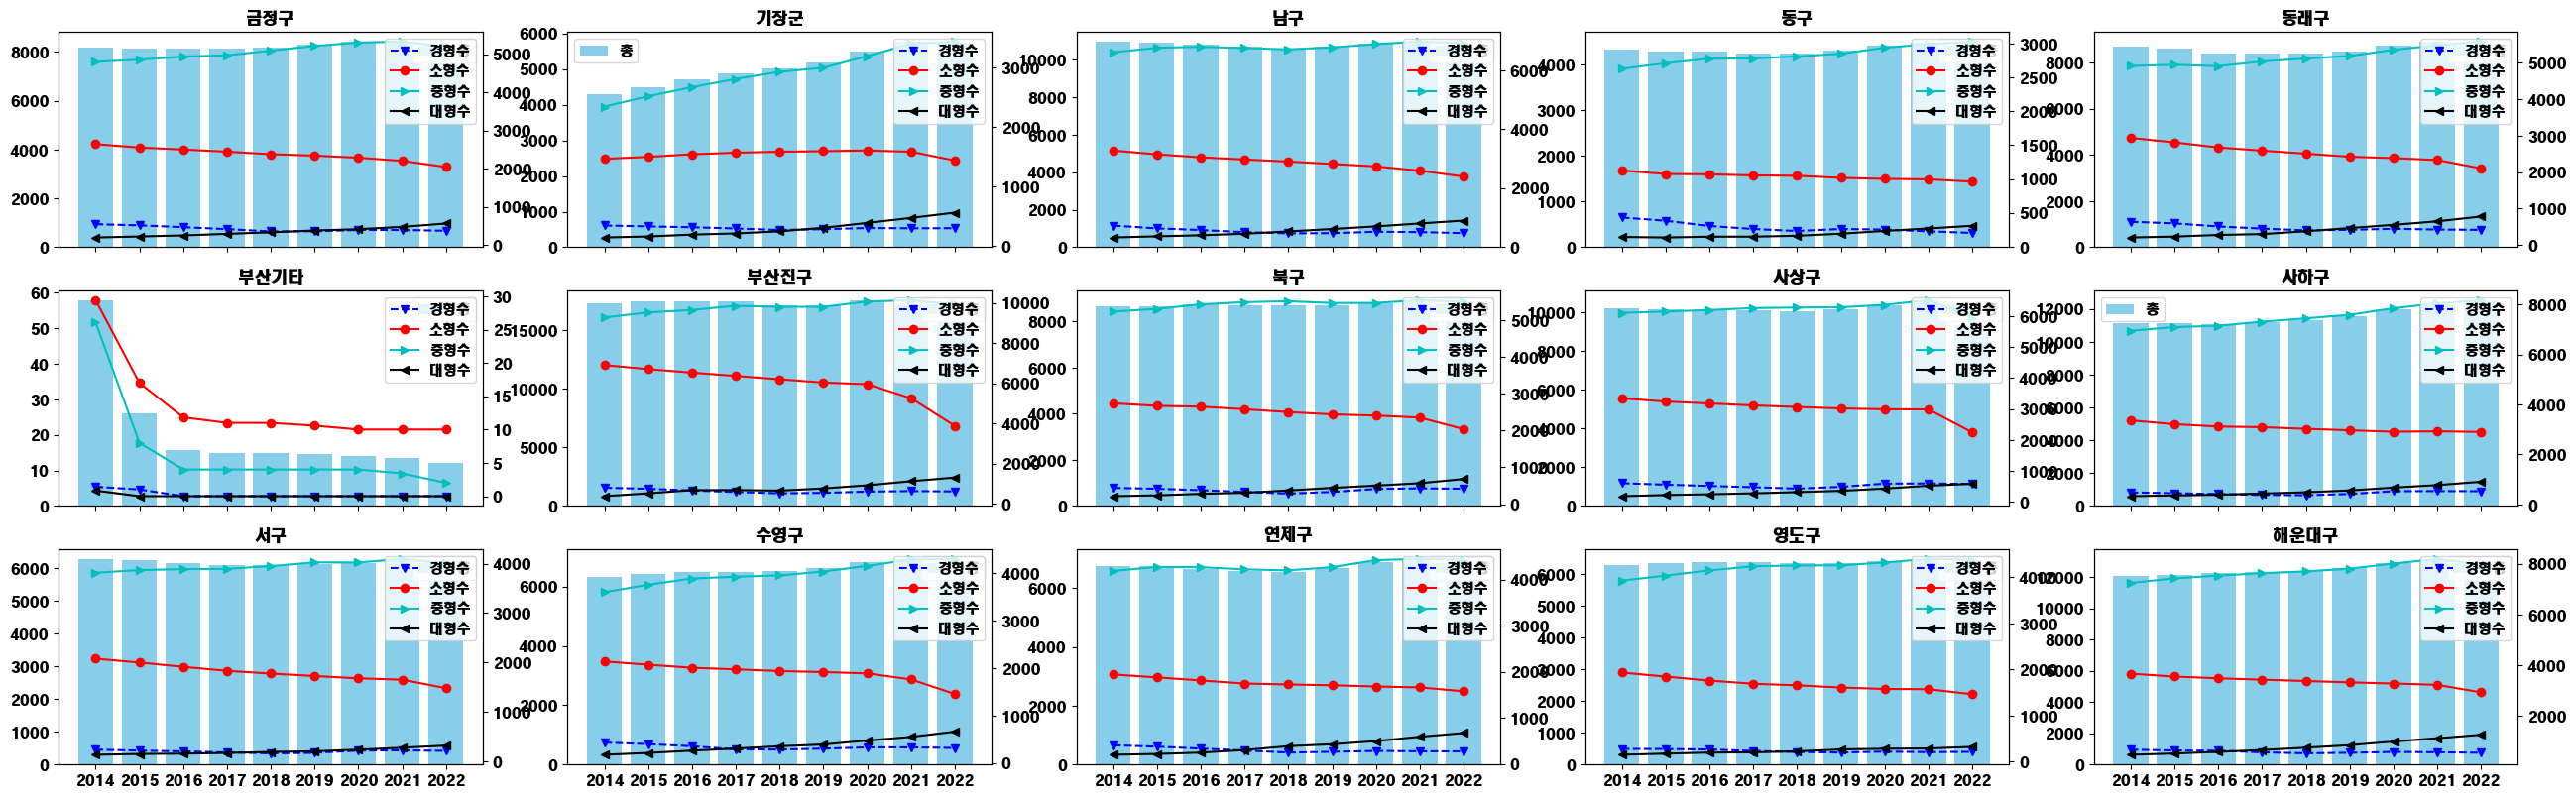

In [46]:
g1 = pd_data.groupby(['시군구(1)','년'])
df_group = g1.mean()
df_group_f = df_group.reset_index()
fig, axes = plt.subplots(3,5,figsize=(6.4*5, 4.8*2),sharex=True)
col_name = df_group_f.columns
df_group_f
for i,e in enumerate(df_group_f['시군구(1)'].unique()):
    filter1 = df_group_f['시군구(1)'] == e
    ax = axes[i//5,i%5]
    xs = df_group_f.loc[filter1,'년']
    ys = df_group_f.loc[filter1,col_name]
    ax.set_title(e)
    ax.bar(xs.astype('str'),ys.iloc[:,16],color='skyblue') # 총등록수
    ax.legend("총등록수")
    ax2 = ax.twinx()
    ax2.plot(xs.astype('str'),ys.iloc[:,12], 'bv--')  # 경형수
    ax2.plot(xs.astype('str'),ys.iloc[:,13], 'ro-')   # 소형수
    ax2.plot(xs.astype('str'),ys.iloc[:,14], 'c>-')   # 중형수
    ax2.plot(xs.astype('str'),ys.iloc[:,15] , 'k<-')   # 대형수
    ax2.legend(ys.iloc[:,12:16])
    
#     ax2.legend(ys.iloc[:,4:6])
    

### 코로나 이전(2014-2018)과 코로나 이후(2018-2021)


* 크기(소형,중형,대형) 비율이 다른가...

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\4166291897.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\4166291897.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv_s = df_group.reset_index().pivot('시군구(1)','년', '소형수')
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\4166291897.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv_m = df_group.reset_index().pivot('시군구(1)','년', '중형수')
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\4166291897.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv_l = df_group.reset_index().pi

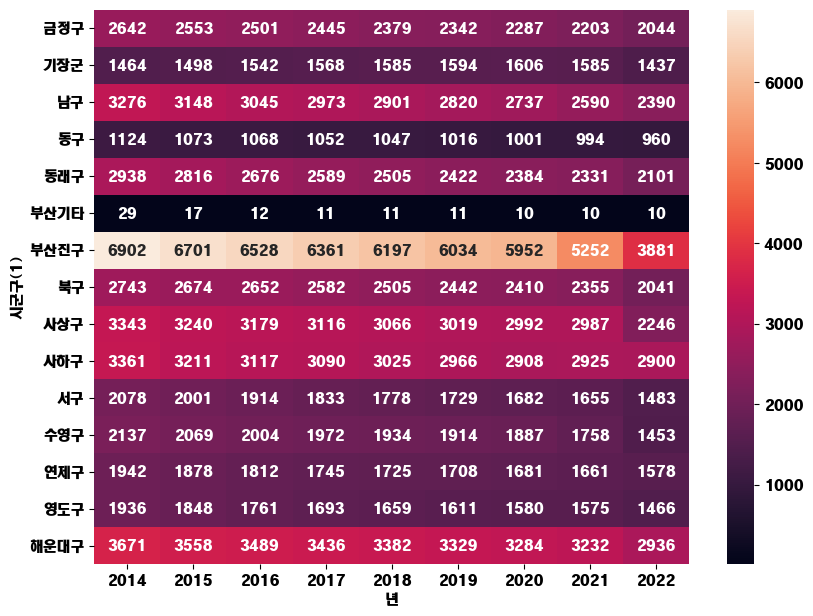

In [7]:
g1 = pd_data.groupby(['시군구(1)','년'])
df_group = g1.mean()
# df_group
fig= plt.figure(figsize=(6.4*1.5,4.8*1.5))
ax1 = fig.add_subplot()
df_group_pv_s = df_group.reset_index().pivot('시군구(1)','년', '소형수')
sns.heatmap(df_group_pv_s, annot=True, fmt='.0f', ax=ax1)
df_group_pv_m = df_group.reset_index().pivot('시군구(1)','년', '중형수')
# b = sns.heatmap(df_group_pv_m)
df_group_pv_l = df_group.reset_index().pivot('시군구(1)','년', '대형수')
# c = sns.heatmap(df_group_pv_l)
# print(a)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\2976410558.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\2976410558.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv_m = df_group.reset_index().pivot('시군구(1)','년', '중형수')


<AxesSubplot: xlabel='년', ylabel='시군구(1)'>

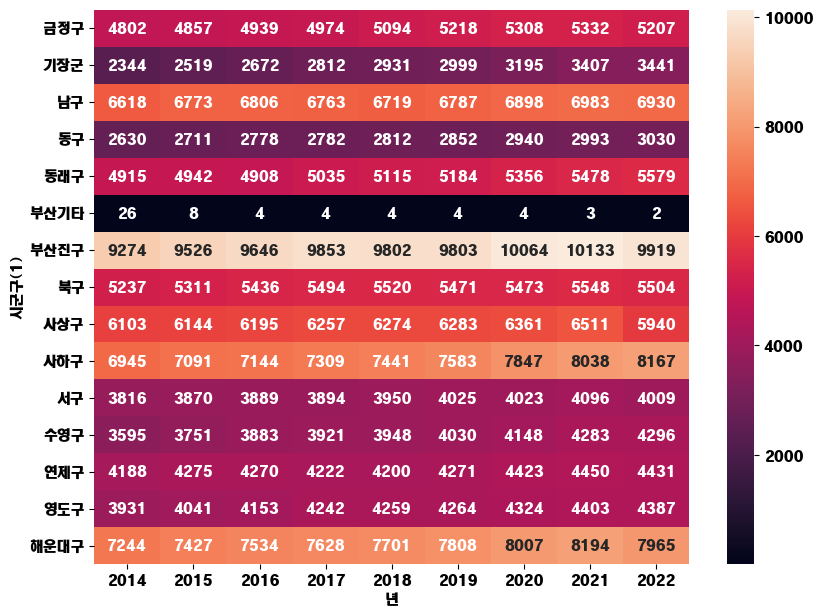

In [47]:
g1 = pd_data.groupby(['시군구(1)','년'])
df_group = g1.mean()
df_group_pv_m = df_group.reset_index().pivot('시군구(1)','년', '중형수')
fig= plt.figure(figsize=(6.4*1.5,4.8*1.5))
ax1 = fig.add_subplot()
sns.heatmap(df_group_pv_m, annot=True, fmt='.0f')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\1192270832.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8628\1192270832.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv_l = df_group.reset_index().pivot('시군구(1)','년', '총등록수')


<AxesSubplot: xlabel='년', ylabel='시군구(1)'>

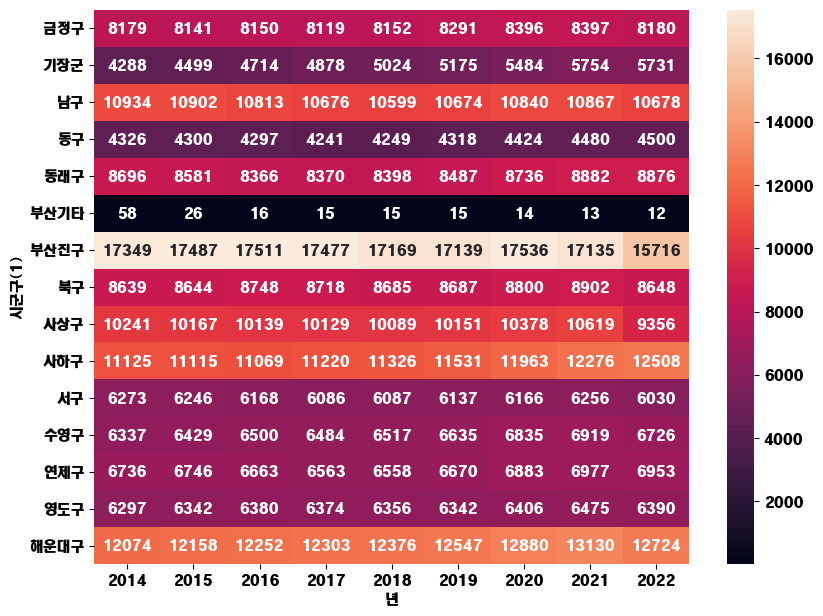

In [9]:
g1 = pd_data.groupby(['시군구(1)','년'])
df_group = g1.mean()
df_group_pv_l = df_group.reset_index().pivot('시군구(1)','년', '총등록수')
fig= plt.figure(figsize=(6.4*1.5,4.8*1.5))
ax1 = fig.add_subplot()
sns.heatmap(df_group_pv_l, annot=True, fmt='.0f')